## ****Importing Required Libraries/Modules****

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.model_selection import GridSearchCV

## ****Loading Data****

In [2]:
train = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

## Exploratory data analysis

#### Columns Description[Given on Kaggle]:

* Location: Street address of the crime incident.
* Cross_Street: Cross street of the rounded address.
* Latitude: Latitude coordinates of the crime incident.
* Longitude: Longitude coordinates of the crime incident.
* Date_Reported: Date the incident was reported.
* Date_Occurred: Date the incident occurred.
* Time_Occurred: Time the incident occurred in 24-hour military time.
* Area_ID: LAPD's Geographic Area number.
* Area_Name: Name designation of the LAPD Geographic Area.
* Reporting_District_no: Reporting district number.
* Part 1-2: Crime classification.
* Modus_Operandi: Activities associated with the suspect.
* Victim_Age: Age of the victim.
* Victim_Sex: Gender of the victim.
* Victim_Descent: Descent code of the victim.
* Premise_Code: Premise code indicating the location of the crime.
* Premise_Description: Description of the premise code.
* Weapon_Used_Code: Weapon code indicating the type of weapon used.
* Weapon_Description: Description of the weapon code.
* Status: Status of the case.
* Status_Description: Description of the status code.
* Crime_Category: The category of the crime (Target Variable)

### From the above data, we have the following observations

1. ##### Area_Name is the descriptive version of Area_ID.
2. ##### Premise_Description is the descriptive version of Premise_Code.
3. ##### Weapon_Description is the descriptive version of Weapon_Used_Code.
4. ##### Status_Description is the descriptive version of Status.

### These descriptive columns are removed from the data for the modelling to avoid multicollinearity.

In [3]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [4]:
test.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [5]:
train.info()
print("-------------------------------------------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

****Data visualization and Exploratory Data Analysis****

In [6]:
print("Summary Statistics:\n")
print(train.describe())

Summary Statistics:

           Latitude     Longitude  Time_Occurred       Area_ID  \
count  20000.000000  20000.000000   20000.000000  20000.000000   
mean      33.940704   -117.893072    1352.380350     10.834250   
std        2.126810      7.377726     646.100291      6.033166   
min        0.000000   -118.663400       1.000000      1.000000   
25%       34.009200   -118.429700     930.000000      6.000000   
50%       34.058700   -118.323000    1430.000000     11.000000   
75%       34.165025   -118.274400    1900.000000     16.000000   
max       34.328100      0.000000    2359.000000     21.000000   

       Reporting_District_no      Part 1-2    Victim_Age  Premise_Code  \
count           20000.000000  20000.000000  20000.000000  20000.000000   
mean             1129.599200      1.418150     30.135000    297.176950   
std               603.330519      0.493267     21.863645    212.007298   
min               101.000000      1.000000     -2.000000    101.000000   
25%           

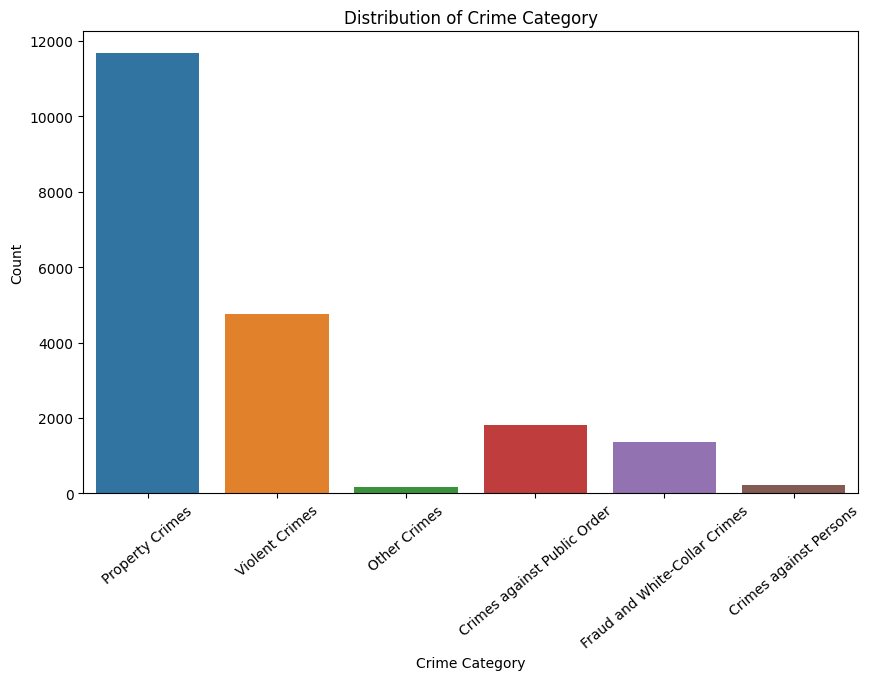

In [7]:
# Distribution of Ratings (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='Crime_Category', data=train)
plt.title('Distribution of Crime Category')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.show()

### Property related crimes followed by Violent Crimes are most common.

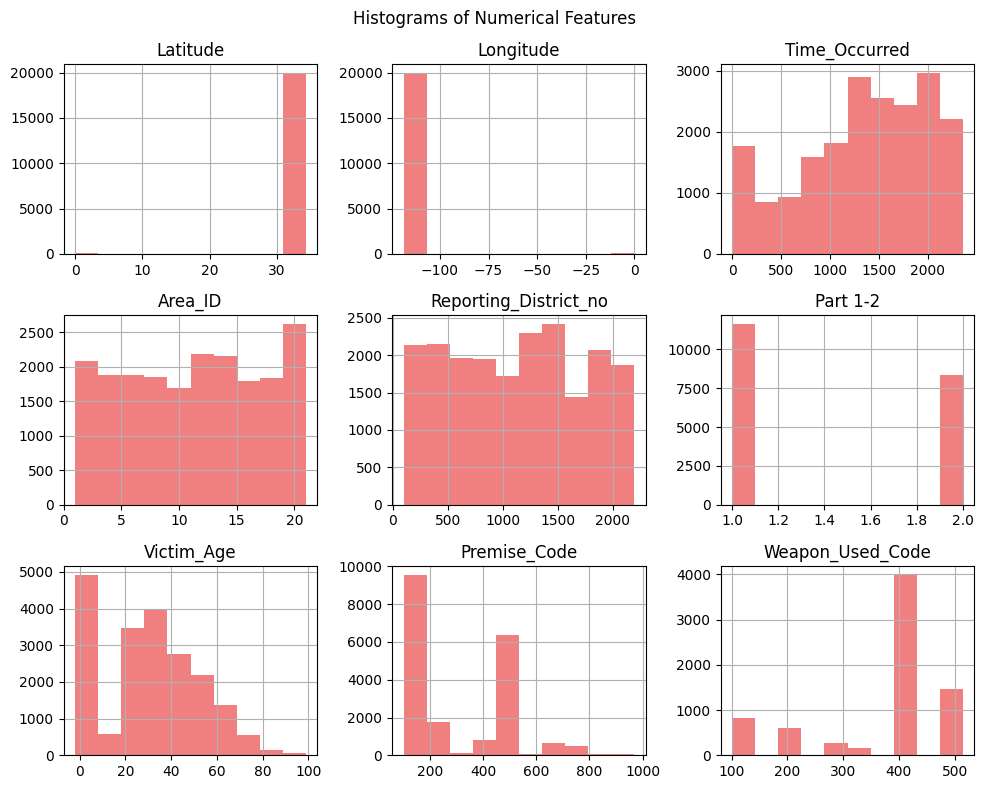

In [8]:
# Visualize numerical features using histograms
train.hist(figsize=(10, 8), color="lightcoral")
plt.suptitle('Histograms of Numerical Features', y=0.98)
plt.tight_layout()
plt.show()

### From the above histograms, we have the following observations

1. ##### Latitude & Latitude columns have outliers.
2. ##### Mostly the crimes are happening between noon(12 PM) & night(12 AM).
3. ##### Crimes are spreaded over all the areas and not limited to any particular area.[From Area ID & Reporting District No. histogram].
4. ##### Mainly,the age of victim lies between 20-50 and it contains a lot of outliers with value 0.
5. ##### Most common way of fighting/commiting a crime is Bare Hands.

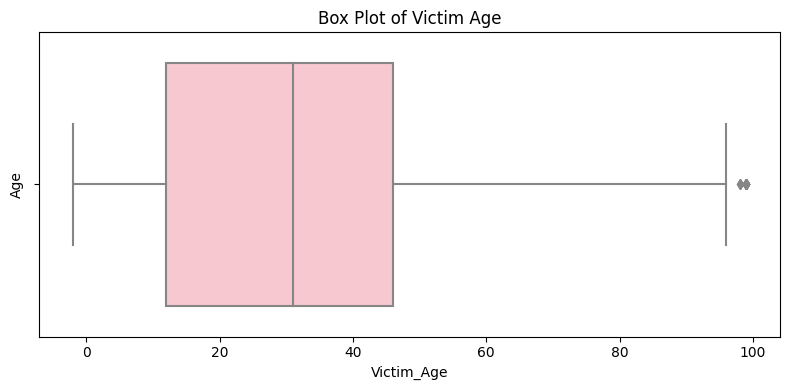

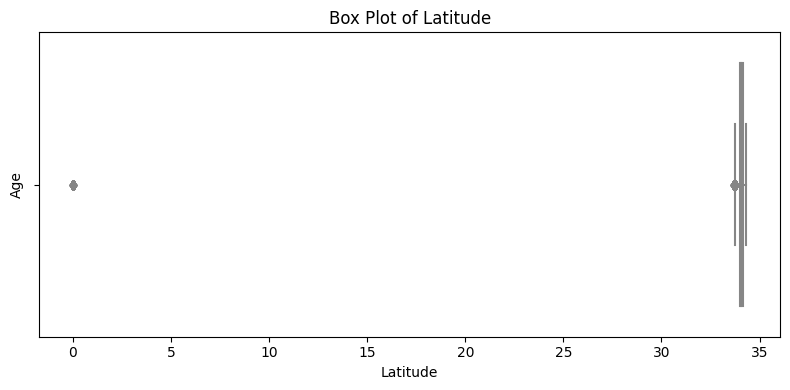

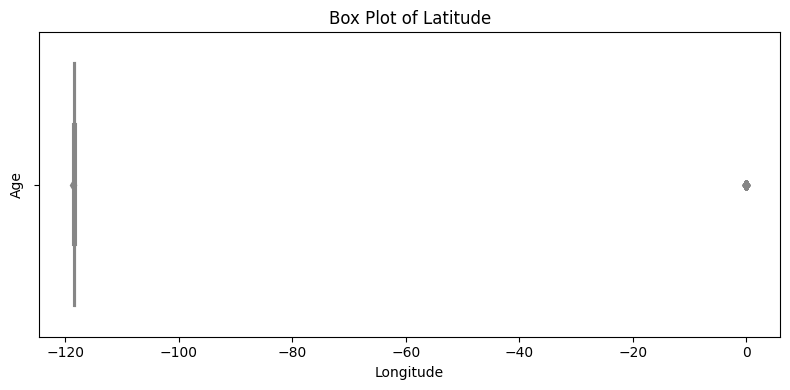

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=train['Victim_Age'], color="pink")
plt.title(f'Box Plot of Victim Age')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=train['Latitude'], color="pink")
plt.title(f'Box Plot of Latitude')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=train['Longitude'], color="pink")
plt.title(f'Box Plot of Latitude')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

### From the above box plots, we have the following observations

1. ##### Age columns have lots of outliers with value near 0 and near 100.
2. ##### Latitude and Longitude both have outliers, confirmed by the above box plot.

### These outliers are removed from the data for the modelling.

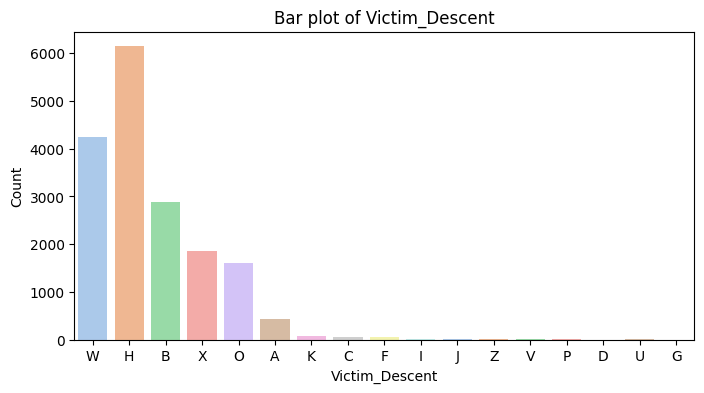

In [10]:
# Bar plot of Crime Category
plt.figure(figsize=(8, 4))
sns.countplot(x='Victim_Descent', data=train, palette='pastel')
plt.title('Bar plot of Victim_Descent')
plt.xlabel('Victim_Descent')
plt.ylabel('Count')
plt.show();

****Heatmap****

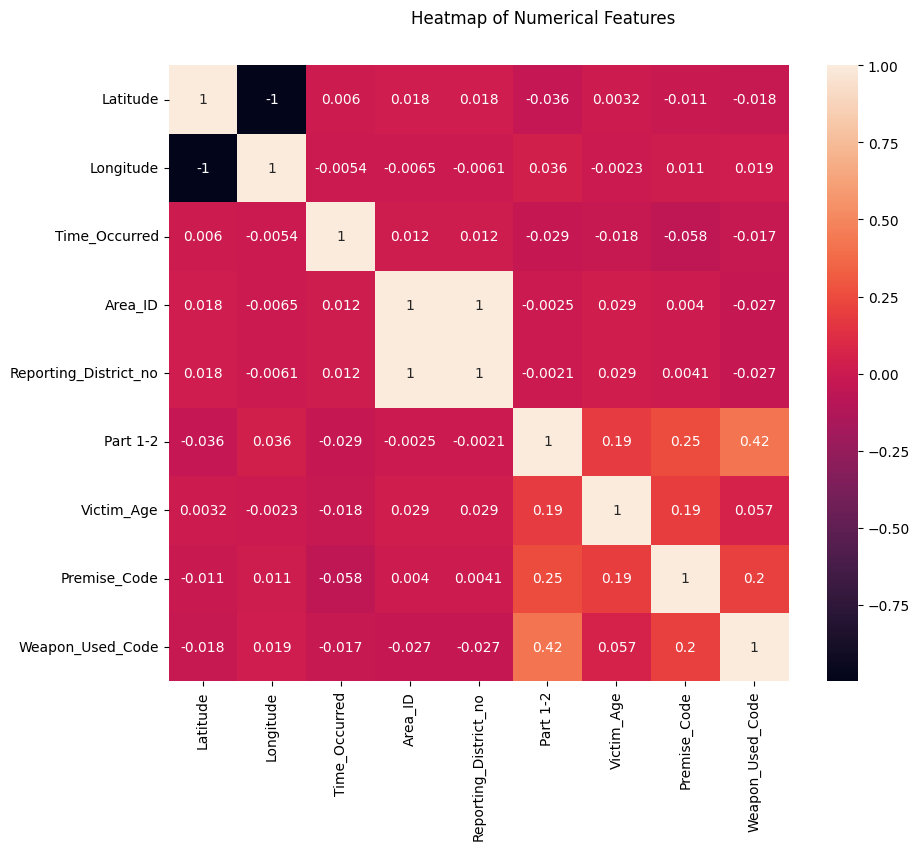

In [11]:
plt.figure(figsize=(10,8))
plt.suptitle('Heatmap of Numerical Features', y=0.95)
correlation_matrix = train.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True);

****Let's check how much rows does this correlation matrix preserve while creating heat map.****

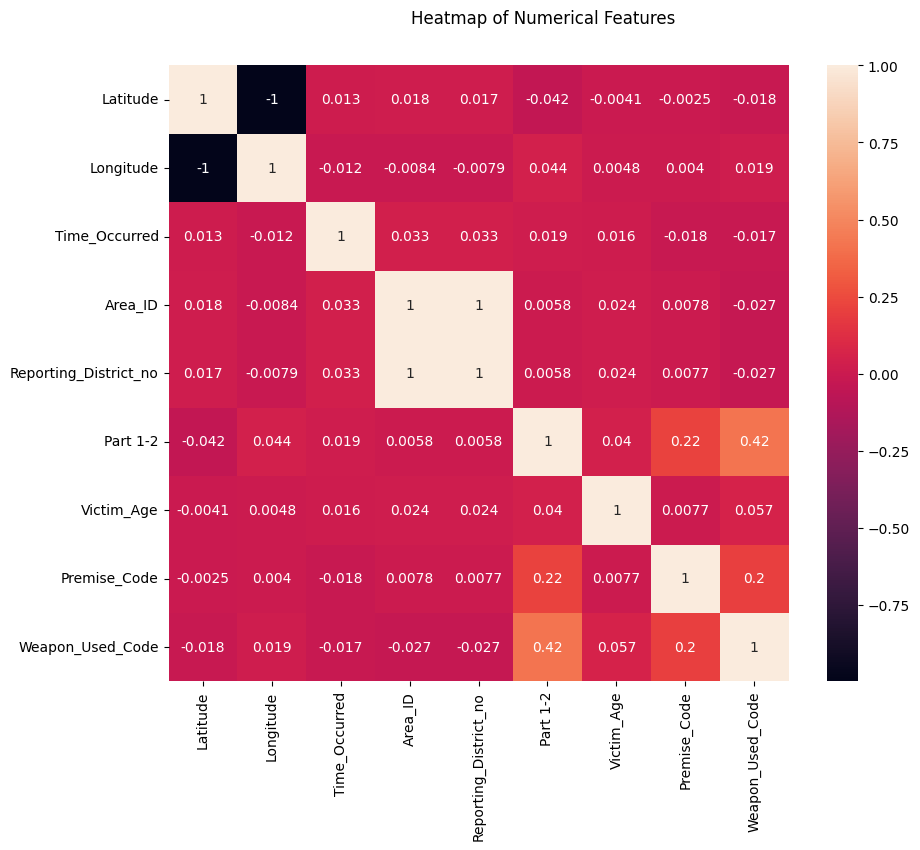

In [12]:
num_df = train.select_dtypes(include=['number']).copy()
num_df.dropna(inplace=True)

plt.figure(figsize=(10,8))
plt.suptitle('Heatmap of Numerical Features', y=0.95)
correlation_matrix = num_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True);

In [13]:
num_df.shape

(7335, 9)

From this, we can conclude that this heatmap is only generated on 7335 rows out of 20000

## ****Detecting Missing Data****

In [14]:
print("Missing data in train data:")
print(train.isnull().sum())
print("---------------------------------------")
print("Missing data in test data:")
print(test.isnull().sum())

Missing data in train data:
Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64
---------------------------------------
Missing data in test data:
Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0


## Preprocessing

****Handling Categorical and Numerical Columns via Imputation, Scaling and Encoding****: handling both numeric and categorical features separately. Numeric features are imputed with median values, while categorical features are imputed with the most frequent value.

* Firstly, we are converting the Date_Reported and Date_Occurred columns to datetime format, extracting useful features such as year, month, day and day of the week.
* The Time_Occurred column is split into Hour_Occurred and Minute_Occurred to facilitate time-based analysis.
* The Modus_Operandi column is imputed with empty strings and then splitted into individual words, which are transformed using MultiLabelBinarizer.
* The Victim_Age column is imputed with its median value for cases where age is zero or negative.
* The Victim_Sex and Victim_Descent are imputed with the most frequent values.
* The Status column is encoded using LabelEncoder.

This structured preprocessing approach ensures that the data is appropriately prepared for training and evaluation in predictive modeling tasks.

In [15]:
def preprocess(train, test):
    print("Data preprocessing start")
    train['Date_Reported'] = pd.to_datetime(train['Date_Reported'], errors='coerce')
    train['Date_Occurred'] = pd.to_datetime(train['Date_Occurred'], errors='coerce')

    train['Year_Reported'] = train['Date_Reported'].dt.year
    train['Month_Reported'] = train['Date_Reported'].dt.month
    train['Day_Reported'] = train['Date_Reported'].dt.day
    train['DayOfWeek_Reported'] = train['Date_Reported'].dt.dayofweek

    train['Year_Occurred'] = train['Date_Occurred'].dt.year
    train['Month_Occurred'] = train['Date_Occurred'].dt.month
    train['Day_Occurred'] = train['Date_Occurred'].dt.day
    train['DayOfWeek_Occurred'] = train['Date_Occurred'].dt.dayofweek
    
    def get_hour(time):
        time_str = str(int(time)).zfill(4)
        return int(time_str[:2])

    def get_minute(time):
        time_str = str(int(time)).zfill(4)
        return int(time_str[2:])

    train['Hour_Occurred'] = train['Time_Occurred'].apply(get_hour)
    train['Minute_Occurred'] = train['Time_Occurred'].apply(get_minute)

    #Performing same thing on test data
    test['Date_Reported'] = pd.to_datetime(test['Date_Reported'], errors='coerce')
    test['Date_Occurred'] = pd.to_datetime(test['Date_Occurred'], errors='coerce')

    test['Year_Reported'] = test['Date_Reported'].dt.year
    test['Month_Reported'] = test['Date_Reported'].dt.month
    test['Day_Reported'] = test['Date_Reported'].dt.day
    test['DayOfWeek_Reported'] = test['Date_Reported'].dt.dayofweek

    test['Year_Occurred'] = test['Date_Occurred'].dt.year
    test['Month_Occurred'] = test['Date_Occurred'].dt.month
    test['Day_Occurred'] = test['Date_Occurred'].dt.day
    test['DayOfWeek_Occurred'] = test['Date_Occurred'].dt.dayofweek

    test['Hour_Occurred'] = test['Time_Occurred'].apply(get_hour)
    test['Minute_Occurred'] = test['Time_Occurred'].apply(get_minute)
    
    train['Modus_Operandi'] = train['Modus_Operandi'].fillna('')
    test['Modus_Operandi'] = test['Modus_Operandi'].fillna('')

    train['Modus_Operandi'] = train['Modus_Operandi'].apply(lambda x: x.split())
    test['Modus_Operandi'] = test['Modus_Operandi'].apply(lambda x: x.split())

    mlb = MultiLabelBinarizer()
    train_mo_trans = pd.DataFrame(mlb.fit_transform(train['Modus_Operandi']), columns=mlb.classes_, index=train.index)
    test_mo_trans = pd.DataFrame(mlb.transform(test['Modus_Operandi']), columns=mlb.classes_, index=test.index)

    train = train.join(train_mo_trans)
    test = test.join(test_mo_trans)

    victim_age_median = train[train['Victim_Age'] > 0]['Victim_Age'].median()

    Q1 = train['Victim_Age'].quantile(0.25)
    Q3 = train['Victim_Age'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 +  1.5 * IQR

    def median_(age):
        if age < lower_bound or age > upper_bound:
            return victim_age_median
        return age

    train['Victim_Age'] = train['Victim_Age'].apply(median_)
    test['Victim_Age'] = test['Victim_Age'].apply(median_)

    train['Victim_Sex'].fillna('M', inplace=True)
    test['Victim_Sex'].fillna('M', inplace=True)

    train['Victim_Descent'].fillna('B', inplace=True)
    test['Victim_Descent'].fillna('B', inplace=True)
    
    #Encoding
    lb = LabelEncoder()
    train['Status'] = lb.fit_transform(train['Status'])
    test['Status'] = lb.transform(test['Status'])


    #Type Conversion
    train['Area_ID'] = train['Area_ID'].astype(int)
    test['Area_ID'] = test['Area_ID'].astype(int)
    
    ## Location-> We get this information by Latitude & Longitude
    ## Cross_Street, Weapon_Used_Code, Weapon_Description -> most of the values are null
    ## Date_Occurred, Date_Reported, Time_Occurred -> Already extracted useful data
    ## Area_Name -> having collinearity with Area_ID
    ## Status_Description -> having collinearity with Status
    ## Premise_Description -> having collinearity with Premise_Code
    
    columns_to_drop = ['Location', 'Cross_Street', 'Date_Occurred', 'Date_Reported', 'Time_Occurred', 'Area_Name',
                       'Status_Description', 'Premise_Description', 'Weapon_Used_Code', 'Weapon_Description', 'Modus_Operandi']

    train.drop(columns=columns_to_drop, inplace=True)
    test.drop(columns=columns_to_drop, inplace=True)
    
    print("Data preprocessing completed")
    return train, test

## ****Feature Extraction and train test splitting****

In [16]:
def preprocess_and_split(train, test):
    train, test = preprocess(train, test)
    print("Data splitting start")
    
    X = train.drop('Crime_Category', axis=1)
    y = train['Crime_Category']
    lb_y = LabelEncoder()
    y_encoded = lb_y.fit_transform(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=True ,stratify= y_encoded)
    
    print("Data splitting completed")
    return X_train, X_test, y_train, y_test, test, lb_y

## ****Preprocessor****
Represents the preprocessing steps, including handling missing values, scaling numerical features, and encoding categorical features.

In [17]:
def create_preprocessor(ohe_columns, ss_columns, pass_columns):
    print("Creating preprocessor")
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    ss = StandardScaler()

    preprocessor = ColumnTransformer(
        transformers=[
            ('ohe', ohe, ohe_columns),
            ('ss', ss, ss_columns),
            ('passthrough', 'passthrough', pass_columns)
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    ).set_output(transform='pandas')
    
    print("Preprocessor created")
    return preprocessor

## ****Creating a Pipeline****

In [18]:
def create_pipeline(ohe_columns, ss_columns, pass_columns):
    print("Creating pipeline")
    preprocessor = create_preprocessor(ohe_columns, ss_columns, pass_columns)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor)
    ])
    
    print("Pipeline created")
    return pipeline

## ***Helper functions***

In [19]:
import lightgbm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    print("--------------------------------------------------------------")
    print(f'Running {model}')
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics = calculate_metrics(model, X_train, y_test, y_pred)
    print_metrics(metrics)
    return {'model': model, 'metrics': metrics, 'y_pred': y_pred}

def perform_grid_search(model, param_grid, X_train, X_test, y_train, y_test):
    print("--------------------------------------------------------------")
    print(f'Running {model}')
    gscv = GridSearchCV(model, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
    gscv.fit(X_train, y_train)
    
    best_model = gscv.best_estimator_
    y_pred = best_model.predict(X_test)
    
    metrics = calculate_metrics(best_model, X_train, y_test, y_pred)
    print_metrics(metrics)
    print("Best Hyperparameters:", gscv.best_params_)
    return {'model': best_model, 'metrics': metrics, 'y_pred': y_pred, 'best_params': gscv.best_params_}

def calculate_metrics(model, X_train, y_test, y_pred):
    score = model.score(X_train, y_train)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return {
        'score': score,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

def print_metrics(metrics):
    print(f"Score : {metrics['score']} \nAccuracy : {metrics['accuracy']} \n"
          f"Precision : {metrics['precision']} \nRecall : {metrics['recall']} \nF1 : {metrics['f1']}")

In [20]:
train = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

X_train, X_test, y_train, y_test, test, lb_y = preprocess_and_split(train, test)
ohe_columns = ['Victim_Sex', 'Victim_Descent', 'Status', 'Area_ID']
ss_columns = ['Latitude', 'Longitude']
pass_columns = ['Premise_Code', 'Reporting_District_no', 'Victim_Age','Year_Reported', 'Month_Reported', 'Day_Reported', 'DayOfWeek_Reported','Year_Occurred', 'Month_Occurred', 'Day_Occurred', 'DayOfWeek_Occurred', 'Hour_Occurred', 'Minute_Occurred']

pipeline = create_pipeline(ohe_columns, ss_columns, pass_columns)
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
test = pipeline.transform(test)

print("Running Models")
# models = run_models(X_train, X_test, y_train, y_test)
# print(models)
models = {}

Data preprocessing start


/tmp/ipykernel_18/2395934523.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Date_Reported'] = pd.to_datetime(train['Date_Reported'], errors='coerce')
/tmp/ipykernel_18/2395934523.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Date_Occurred'] = pd.to_datetime(train['Date_Occurred'], errors='coerce')
/tmp/ipykernel_18/2395934523.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Date_Reported'] = pd.to_datetime(test['Date_Reported'], errors='coerce')
/tmp/ipykernel_18/2395934523.py:29: UserWarning: Could not infer format, so each element will b

Data preprocessing completed
Data splitting start
Data splitting completed
Creating pipeline
Creating preprocessor
Preprocessor created
Pipeline created
Running Models


## Testing Models

In [21]:
# LGBM Classifier
lgbm = lightgbm.LGBMClassifier(random_state=64)
models['LGBM'] = train_and_evaluate_model(lgbm, X_train, X_test, y_train, y_test)

--------------------------------------------------------------
Running LGBMClassifier(random_state=64)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1613
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 222
[LightGBM] [Info] Start training from score -4.487387
[LightGBM] [Info] Start training from score -2.403788
[LightGBM] [Info] Start training from score -2.691931
[LightGBM] [Info] Start training from score -4.717499
[LightGBM] [Info] Start training from score -0.539032
[LightGBM] [Info] Start training from score -1.433910
Score : 0.9995625 
Accuracy : 0.9555 
Precision : 0.9544751048786476 
Recall : 0.9555 
F1 : 0.95364447135118


In [22]:
# LGBM Classifier with balanced class weights
# lgbm = lightgbm.LGBMClassifier(random_state=64, class_weight='balanced')
# models['LGBM_with_balanced_class'] = train_and_evaluate_model(lgbm, X_train, X_test, y_train, y_test)
# Score : 0.996625 
# Accuracy : 0.953 
# Precision : 0.952648755401734 
# Recall : 0.953 
# F1 : 0.9523798028252852

In [23]:
# LGBM Hypertuned
lgbm_params = {
    'boosting_type': ['gbdt'], #'dart', 'goss'], #gbdt
    'num_leaves': [31],# 50, 100, 150], #31
    'max_depth': [-1],# 10, 20, 30, 50], #-1
    'learning_rate': [0.1],#0.001, 0.01, 0.1, 0.2, 0.3], #0.1
    'n_estimators': [100], #50, 100, 200, 300], #100
    'subsample': [1.0], #0.6, 0.8, 1.0], #1.0
    'colsample_bytree': [1], #0.6, 0.8, 1.0], #1
    'reg_alpha': [0], #, 0.1, 0.5, 1.0], #0
    'reg_lambda': [0] #, 0.1, 0.5, 1.0] #0
}

models['LGBM_Hypertuned'] = perform_grid_search(lgbm, lgbm_params, X_train, X_test, y_train, y_test)

--------------------------------------------------------------
Running LGBMClassifier(random_state=64)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1493
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 181
[LightGBM] [Info] Start training from score -4.487387
[LightGBM] [Info] Start training from score -2.403788
[LightGBM] [Info] Start training from score -2.691931
[LightGBM] [Info] Start training from score -4.710531
[LightGBM] [Info] Start training from score -0.539139
[LightGBM] [Info] Start training from score -1.433910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace w

In [24]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state=64)
models['RFC'] = train_and_evaluate_model(rfc, X_train, X_test, y_train, y_test)

--------------------------------------------------------------
Running RandomForestClassifier(random_state=64)
Score : 1.0 
Accuracy : 0.937 
Precision : 0.9332727022030827 
Recall : 0.937 
F1 : 0.9305652066745855


In [25]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=64)
models['GBC'] = train_and_evaluate_model(gbc, X_train, X_test, y_train, y_test)

--------------------------------------------------------------
Running GradientBoostingClassifier(random_state=64)
Score : 0.9559375 
Accuracy : 0.94225 
Precision : 0.939946598686503 
Recall : 0.94225 
F1 : 0.9401173545023642


In [26]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=64)
models['DTC'] = train_and_evaluate_model(dtc, X_train, X_test, y_train, y_test)

--------------------------------------------------------------
Running DecisionTreeClassifier(random_state=64)
Score : 1.0 
Accuracy : 0.92175 
Precision : 0.9201865354246005 
Recall : 0.92175 
F1 : 0.9208764527405314


In [27]:
# DTC Hypertuned
dtc = DecisionTreeClassifier(random_state=64)
dtc_params = {
    'criterion' : ['gini'],# 'entropy'],# 'log_loss'],
    'splitter':['best'],#, 'random'],
    'max_depth' : [40,45,50,80,100],#[8, 7, 8, 9, 10,12,15,20,25,],
    'min_samples_split' : [30,31],#[40,45,50],
    'max_features' :[None]#, 0.25, 0.5, 1]
}

models['DTC_Hypertuned'] = perform_grid_search(dtc, dtc_params, X_train, X_test, y_train, y_test)

--------------------------------------------------------------
Running DecisionTreeClassifier(random_state=64)
Score : 0.959875 
Accuracy : 0.9295 
Precision : 0.9290998644536991 
Recall : 0.9295 
F1 : 0.9291087912609407
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 40, 'max_features': None, 'min_samples_split': 31, 'splitter': 'best'}


## ****Prediction on test data and Submission****

In [28]:
models

{'LGBM': {'model': LGBMClassifier(random_state=64),
  'metrics': {'score': 0.9995625,
   'accuracy': 0.9555,
   'precision': 0.9544751048786476,
   'recall': 0.9555,
   'f1': 0.95364447135118},
  'y_pred': array([5, 4, 4, ..., 4, 4, 2])},
 'LGBM_Hypertuned': {'model': LGBMClassifier(colsample_bytree=1, random_state=64, reg_alpha=0, reg_lambda=0),
  'metrics': {'score': 0.9995625,
   'accuracy': 0.9555,
   'precision': 0.9544751048786476,
   'recall': 0.9555,
   'f1': 0.95364447135118},
  'y_pred': array([5, 4, 4, ..., 4, 4, 2]),
  'best_params': {'boosting_type': 'gbdt',
   'colsample_bytree': 1,
   'learning_rate': 0.1,
   'max_depth': -1,
   'n_estimators': 100,
   'num_leaves': 31,
   'reg_alpha': 0,
   'reg_lambda': 0,
   'subsample': 1.0}},
 'RFC': {'model': RandomForestClassifier(random_state=64),
  'metrics': {'score': 1.0,
   'accuracy': 0.937,
   'precision': 0.9332727022030827,
   'recall': 0.937,
   'f1': 0.9305652066745855},
  'y_pred': array([5, 5, 4, ..., 4, 4, 2])},
 'GB

In [29]:
best_model = max(models, key=lambda k: models[k]['metrics']['accuracy'])
best_model = models[best_model]['model']
best_model

LGBMClassifier(random_state=64)

In [30]:
# Make predictions on test data
y_pred_test = best_model.predict(test)

#Converting the numbers back to category
y_pred_test_og = lb_y.inverse_transform(y_pred_test)

# Create submission DataFrame
submission_df = pd.DataFrame({'ID': test.index + 1, 'Crime_Category' : y_pred_test_og})

# Save submission to CSV file
submission_df.to_csv('submission.csv', index=False)

In [31]:
y_pred_train = best_model.predict(X_train)
classification_report_train = classification_report(y_train, y_pred_train)
print("Classification Report on Training Data:\n", classification_report_train)

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00      1446
           2       1.00      1.00      1.00      1084
           3       1.00      1.00      1.00       143
           4       1.00      1.00      1.00      9333
           5       1.00      1.00      1.00      3814

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



In [32]:
names = [str(key).split('(')[0] for key in models.keys()]
accuracies = [models[key]['metrics']['accuracy'] for key in models.keys()]

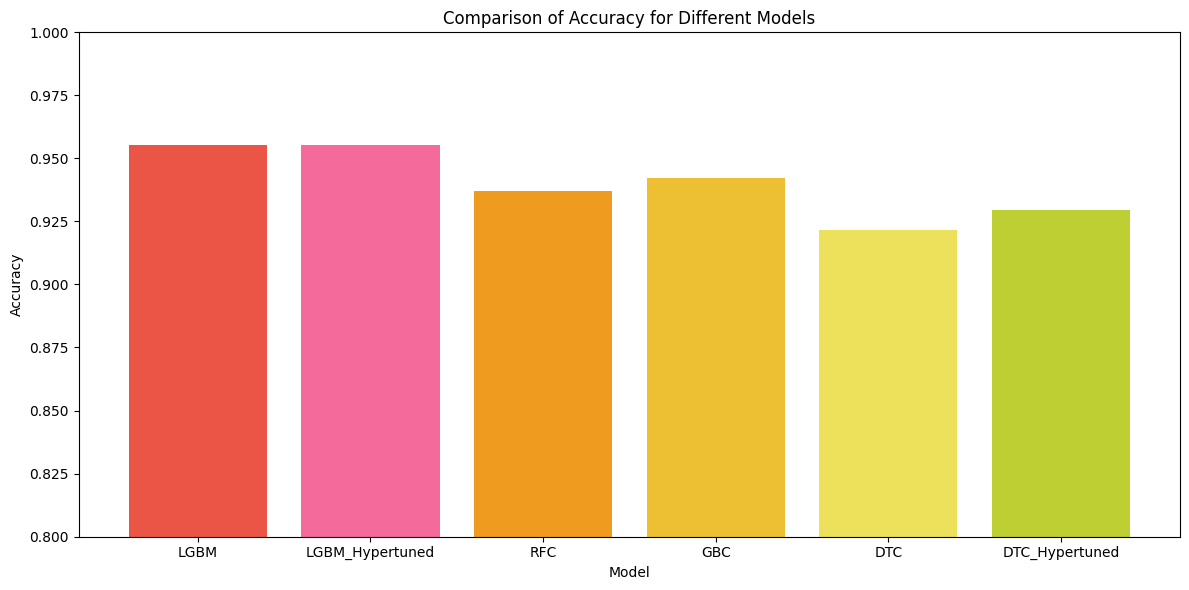

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(names, accuracies, color = ["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Models')
plt.ylim(0.8, 1)

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
lb_y.inverse_transform([0,1,2,3,4,5])

array(['Crimes against Persons', 'Crimes against Public Order',
       'Fraud and White-Collar Crimes', 'Other Crimes', 'Property Crimes',
       'Violent Crimes'], dtype=object)

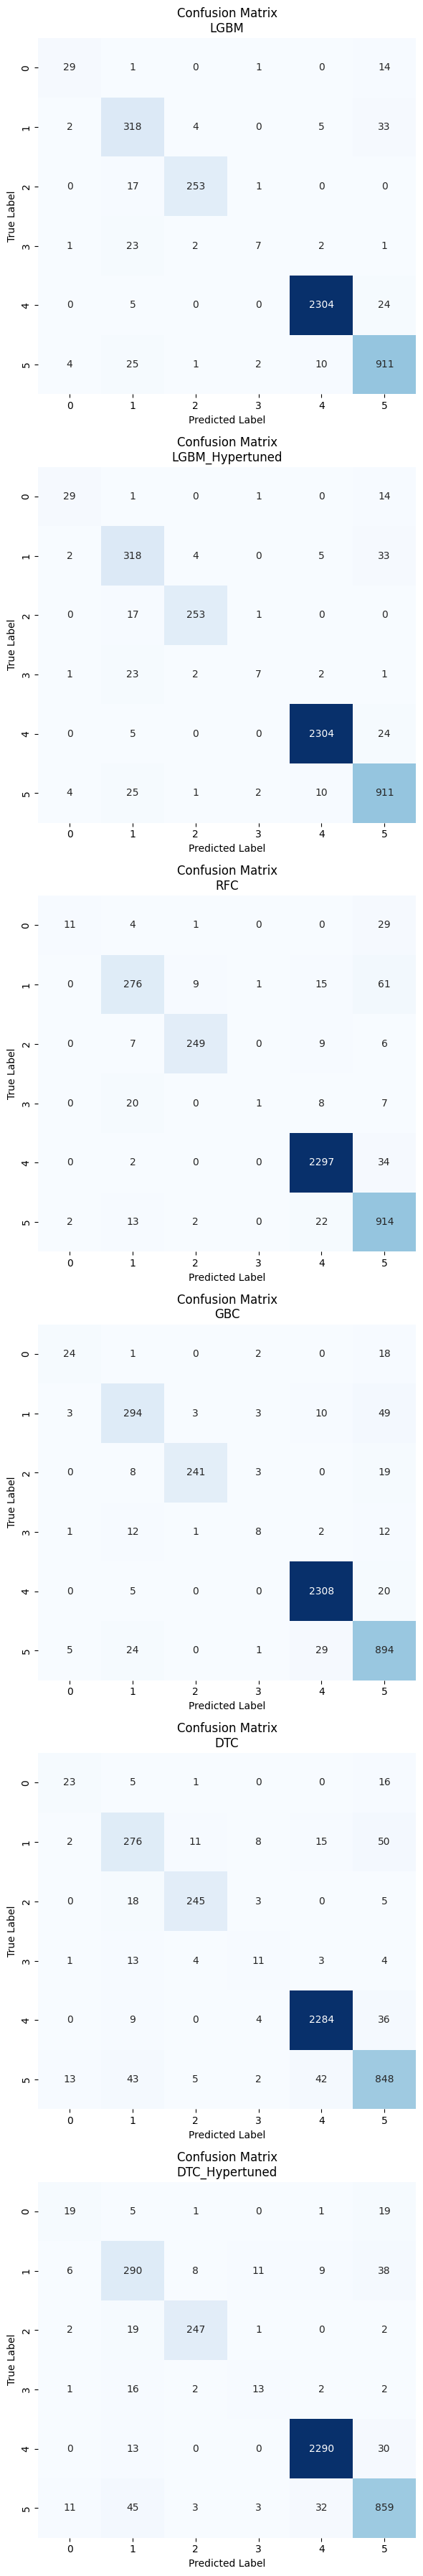

In [35]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(models), ncols=1, figsize=(6, 6 * len(models)))

# Plot confusion matrix for each model
for ax, (model_name, metrics) in zip(axes, models.items()):
    y_pred = metrics['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'Confusion Matrix\n{str(model_name).split("(")[0]}')

plt.tight_layout()
plt.show();

## Extra Models (Ignore)

In [36]:
# from sklearn.model_selection import GridSearchCV, KFold

# dtc = DecisionTreeClassifier(random_state=64)

# param_grid = {
#     'criterion' : ['gini'],# 'entropy'],# 'log_loss'],
#     'splitter':['best'],#, 'random'],
#     'max_depth' : [40]#,45,50,80,100],#[8, 7, 8, 9, 10,12,15,20,25,],
#     'min_samples_split' : [30,31],#[40,45,50],
#     'max_features' :[None]#, 0.25, 0.5, 1]
# }

# gscv = GridSearchCV(dtc, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
# gscv.fit(X_train, y_train)

# best_estimator = gscv.best_estimator_
# y_pred = best_estimator.predict(X_test)

# score = best_estimator.score(X_train, y_train)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Score : {score} \nAccuracy : {accuracy} \nPrecision : {precision} \nRecall : {recall} \nF1 : {f1}')

# print("Best Hyperparameters:", gscv.best_params_)
# models[best_estimator] = {'accuracy': accuracy,
#               'y_pred':y_pred}

# # Score : 1.0 
# # Accuracy : 0.926 
# # Precision : 0.9272934009488824 
# # Recall : 0.926 
# # F1 : 0.9265197193193766
# # Best Hyperparameters: {'criterion': 'gini', 'max_depth': 40, 'max_features': None, 'min_samples_split': 30, 'splitter': 'best'}

In [37]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier(random_state=64)
# xgb.fit(X_train, y_train)

# y_pred = xgb.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# score = xgb.score(X_train, y_train)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Score : {score} \nAccuracy : {accuracy} \nPrecision : {precision} \nRecall : {recall} \nF1 : {f1}')
# models[xgb] = {'accuracy': accuracy,
#               'y_pred':y_pred}

In [38]:
# import pandas as pd
# import lightgbm as lgb
# from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.ensemble import RandomForestClassifier

# X = train.drop(['Crime_Category'], axis=1)
# y = train['Crime_Category']

# lb = LabelEncoder()
# y_encoded = lb.fit_transform(y)

# mean_imputer = SimpleImputer(strategy='mean')
# most_freq_imputer = SimpleImputer(strategy='most_frequent')
# ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# # model = lgb.LGBMClassifier(random_state=42)
# model = RandomForestClassifier()

# numeric_cols = X.select_dtypes(include=['number']).columns
# categorical_cols = X.select_dtypes(exclude=['number']).columns

# num_transformer = Pipeline([('impute', mean_imputer), ('scale', StandardScaler())])
# cat_transformer = Pipeline([('impute', most_freq_imputer), ('ohe', ohe)])

# ct = ColumnTransformer(transformers=[
#     ('num', num_transformer, numeric_cols),
#     ('cat', cat_transformer, categorical_cols)
# ])

# pipeline = Pipeline([
#     ('preprocessor', ct),
#     ('model', model)
# ])

# param_grid = {
# }

# gscv = GridSearchCV(pipeline, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
# gscv.fit(X, y_encoded)

# best_estimator = gscv.best_estimator_
# y_pred = best_estimator.predict(X)

# accuracy = accuracy_score(y_encoded, y_pred)
# precision = precision_score(y_encoded, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_encoded, y_pred, average='weighted')
# f1 = f1_score(y_encoded, y_pred, average='weighted')

# print(f'Accuracy : {accuracy:.4f}')
# print(f'Precision : {precision:.4f}')
# print(f'Recall : {recall:.4f}')
# print(f'F1 Score : {f1:.4f}')
# print("Best Hyperparameters:", gscv.best_params_)

In [39]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.dummy import DummyClassifier

# X = train.drop('Crime_Category', axis=1)
# y = train['Crime_Category']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# dummy = DummyClassifier(strategy='most_frequent')
# dummy.fit(X_train, y_train)

# dummy.predict(X_test.iloc[0:1])

In [40]:
# train = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
# test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

# train = train[train['Victim_Sex'] != 'H']

# def modus(row):
#   if row == 'nan':
#     return np.nan
#   else:
#     return len(row.split())

# train['Modus_Operandi'] = train['Modus_Operandi'].astype(str)
# train['Modus_Operandi_Count'] = train['Modus_Operandi'].apply(modus)

# train.drop(['Cross_Street', 'Date_Reported', 'Date_Occurred', 'Status_Description', 'Weapon_Description', 'Premise_Description', 'Area_Name', 'Location', 'Area_ID', 'Modus_Operandi'], axis=1, inplace=True)

# test['Modus_Operandi'] = test['Modus_Operandi'].astype(str)
# test['Modus_Operandi_Count'] = test['Modus_Operandi'].apply(modus)

# test.drop(['Cross_Street', 'Date_Reported', 'Date_Occurred', 'Status_Description', 'Weapon_Description', 'Premise_Description', 'Area_Name', 'Location', 'Area_ID', 'Modus_Operandi'], axis=1, inplace=True)

In [41]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer, KNNImputer
# from sklearn.preprocessing import OneHotEncoder

# most_freq = SimpleImputer(strategy='most_frequent')
# ohe = OneHotEncoder(sparse_output=False)
# knn = KNNImputer(weights='uniform', n_neighbors=10)

# pipe_sex = Pipeline([('impute', most_freq),
#          ('preprocess', ohe)])

# pipe_desc = Pipeline([('impute', most_freq),
#          ('preprocess', ohe)])

# ct = ColumnTransformer(transformers=[
#     ('sex', pipe_sex, ['Victim_Sex']),
#     ('descent', pipe_desc, ['Victim_Descent']),
#     ('weapon_used_code', most_freq, ['Weapon_Used_Code']),
#     ('status', ohe, ['Status']),
#     ('modus', knn, ['Modus_Operandi_Count'])],
#     remainder='passthrough')


# train_trans =  ct.fit_transform(train)
# train_trans = pd.DataFrame(train_trans)

# test_trans =  ct.fit_transform(test)
# test_trans = pd.DataFrame(test_trans)
# test_trans = pd.DataFrame(test_trans, columns=ct.get_feature_names_out())

# #Converting the datatype from object to int
# for col in train_trans.columns:
#     if col in 'remainder__Crime_Category':
#       continue
#     else:
#       train_trans[col] = train_trans[col].astype(int)
#       test_trans[col] = test_trans[col].astype(int)

# train_trans

In [42]:
# from sklearn.model_selection import train_test_split

# X = train_trans.iloc[:,:34]
# y = train_trans.iloc[:,34]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64, stratify=y)

In [43]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV, KFold

# dtc = DecisionTreeClassifier(random_state=64)
# cv = KFold(n_splits=5, shuffle=True, random_state=64)
# param_grid = {
#     'criterion' : ['gini'], #, 'entropy', 'log_loss'],
#     'max_depth' : [8], #[7, 8, 9, 10]
#     'min_samples_split' : [35]
# }

# dtc_gscv = GridSearchCV(dtc, param_grid=param_grid, cv=cv)
# dtc_gscv.fit(X_train, y_train)

# y_pred = dtc_gscv.predict(X_test)

# score = dtc_gscv.score(X_test, y_test)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Score : {score} \nAccuracy : {accuracy} \nPrecision : {precision} \nRecall : {recall} \nF1 : {f1}')
# print("Best Hyperparameters:", dtc_gscv.best_params_)

In [44]:
# from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(random_state=64, activation='logistic', alpha=0.001)
# mlp.fit(X_train, y_train)

# train_score = mlp.score(X_train, y_train)
# y_pred = mlp.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Train Score : {train_score} \nAccuracy : {accuracy} \nPrecision : {precision} \nRecall : {recall} \nF1 : {f1}')

In [45]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# base_dc = DecisionTreeClassifier(random_state=64, max_depth=8, criterion='gini', min_samples_split=35)
# ovr_classifier = OneVsRestClassifier(base_dc)
# cv = KFold(n_splits=10, shuffle=True, random_state=64)

# grid_search = GridSearchCV(estimator=ovr_classifier, param_grid={}, cv=cv, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_estimator = grid_search.best_estimator_

# y_pred = best_estimator.predict(X_test)

# score = best_estimator.score(X_train, y_train)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Score : {score} \nAccuracy : {accuracy} \nPrecision : {precision} \nRecall : {recall} \nF1 : {f1}')
# print("Best Hyperparameters:", grid_search.best_params_)

### DTC with Ada Boost

Score : 0.8556694586823352
Accuracy : 0.81025
Precision : 0.8077083469386158
Recall : 0.81025
F1 : 0.8048202590218853
Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}

In [46]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# base_dc = DecisionTreeClassifier(random_state=64, max_depth=8, criterion='gini', min_samples_split=35)
# ada = AdaBoostClassifier(base_dc, random_state=64, algorithm='SAMME', n_estimators=50, learning_rate=0.1)

# ada.fit(X_train, y_train)

# y_pred = ada.predict(X_test)

# score = ada.score(X_train, y_train)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Score : {score} \nAccuracy : {accuracy} \nPrecision : {precision} \nRecall : {recall} \nF1 : {f1}')

In [47]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# gbc = GradientBoostingClassifier(random_state=64, n_estimators=300, learning_rate=0.05, subsample=0.75, min_samples_split=10)

# gbc.fit(X_train, y_train)
# y_pred = gbc.predict(X_test)

# score = gbc.score(X_train, y_train)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Score : {score} \nAccuracy : {accuracy} \nPrecision : {precision} \nRecall : {recall} \nF1 : {f1}')
# # print("Best Hyperparameters:", grid_search.best_params_)
# # Score : 0.8493561695211902
# # Accuracy : 0.81675
# # Precision : 0.8131483368015906
# # Recall : 0.81675
# # F1 : 0.8115259018551936

In [48]:
# from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# gbc = GradientBoostingClassifier(random_state=64, n_estimators=300, learning_rate=0.05, subsample=0.75, min_samples_split=10)
# ada = AdaBoostClassifier(gbc, random_state=64, algorithm='SAMME')

# ada.fit(X_train, y_train)
# y_pred = ada.predict(X_test)

# score = ada.score(X_train, y_train)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Score : {score} \nAccuracy : {accuracy} \nPrecision : {precision} \nRecall : {recall} \nF1 : {f1}')
# # print("Best Hyperparameters:", grid_search.best_params_)

In [49]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# rfc = RandomForestClassifier()

# rfc.fit(X_train, y_train)
# y_pred = rfc.predict(X_test)

# score = rfc.score(X_train, y_train)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Score : {score} \nAccuracy : {accuracy} \nPrecision : {precision} \nRecall : {recall} \nF1 : {f1}')

In [50]:
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# rfc = HistGradientBoostingClassifier(random_state=64, warm_start=True, learning_rate=0.05)

# rfc.fit(X_train, y_train)
# y_pred = rfc.predict(X_test)

# score = rfc.score(X_train, y_train)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f'Score : {score} \nAccuracy : {accuracy} \nPrecision : {precision} \nRecall : {recall} \nF1 : {f1}')

In [51]:
# y_pre_test = dummy.predict(test)

# submission_df = pd.DataFrame({'ID': test.index + 1, 'Crime_Category' : y_pre_test.reshape(-1)})

# submission_df.to_csv('submission.csv', index=False)

In [52]:
# submission_df.Crime_Category.value_counts()